In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [131]:
df = pd.read_csv('../data/data-science-proyecto2-master/synergy_logistics_database.csv')

In [132]:
print(df.shape)
df.head(2)

(19056, 10)


,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000


## Option 1

In [133]:
df_op1 = df.groupby(['destination']).count().sort_values('register_id', ascending=False)[['direction']]
df_op1 = df_op1.reset_index().rename(columns={'destination':'Paises destino','direction':'Total de impotaciones y exportaciones'})
df_op1.iloc[0:10].to_csv('Opcion_1.csv')

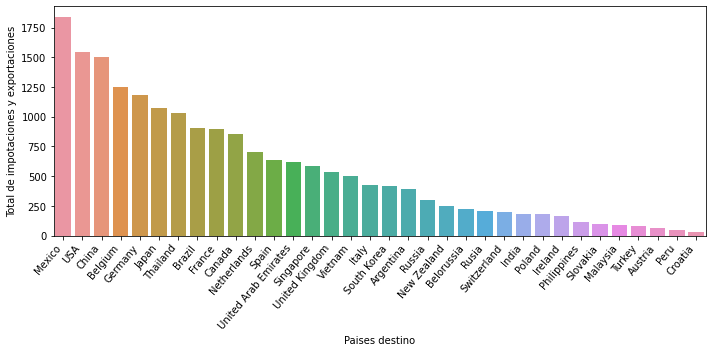

In [137]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x= df_op1['Paises destino'],
           y=df_op1['Total de impotaciones y exportaciones'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

plt.savefig('Opcion1.png')

plt.tight_layout()
plt.show()

### Distribution analysis

In [85]:
df_op1_v2 = df.groupby(['origin','year']).count().sort_values('register_id', ascending=False).reset_index().copy()

In [86]:
df_op1_v2 = df_op1_v2.groupby('origin').agg(['mean','std'])['register_id'].sort_values('mean', ascending=False)
df_op1_v2.reset_index()

,origin,mean,std
0,China,378.666667,47.441192
1,USA,306.666667,91.925332
2,Japan,283.666667,97.450842
3,Germany,277.333333,116.500072
4,South Korea,215.833333,40.582837
5,Mexico,189.666667,93.004659
6,United Kingdom,185.800000,92.488918
7,France,181.333333,89.081236
8,Italy,162.000000,128.848749
9,Australia,160.833333,48.076675


## Option 2

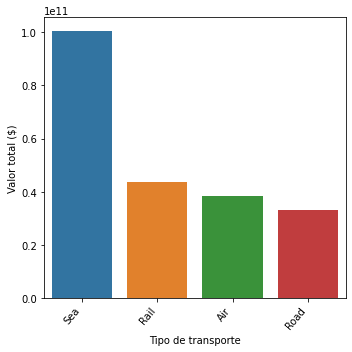

In [106]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=df_op2['Tipo de transporte'],
           y=df_op2['Valor total ($)'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

plt.savefig('Opcion2.png')

plt.tight_layout()
plt.show()

### Total amount

In [143]:
df_op2.iloc[0:3]['Valor total ($)'].sum()

182420812000

## Option 3

In [119]:
df_op3 = df.groupby(['origin']).sum().sort_values('total_value', ascending=False).reset_index().copy()
df_op3['pct'] = 100*df_op3['total_value'].cumsum() / sum(df_op3['total_value'])

In [120]:
df_op3 = df_op3[['origin','total_value','pct']].rename(columns={'origin':'Paises',
                                                                         'total_value':'Valor total ($)',
                                                                         'pct':'Porcentaje acumulado'})
df_op3.loc[df_op3['Porcentaje acumulado']<=80]

,Paises,Valor total ($),Porcentaje acumulado
0,China,45210046000,20.960533
1,USA,23646306000,31.923565
2,Japan,20042976000,41.216001
3,France,19930332000,50.456213
4,South Korea,18510146000,59.037990
5,Germany,15593233000,66.267411
6,Russia,14074000000,72.792477
7,Canada,11253000000,78.009656


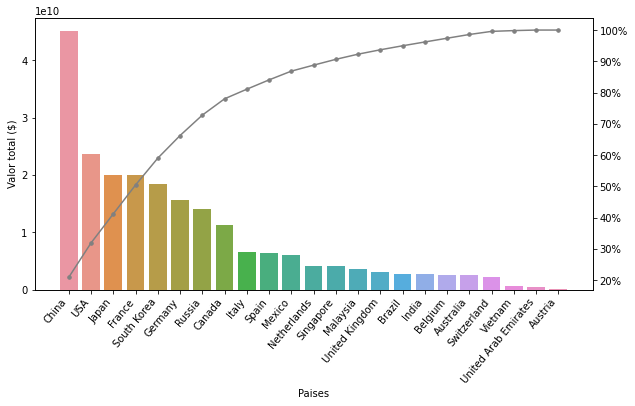

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=df_op3['Paises'],y=df_op3["Valor total ($)"], ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

ax2 = ax.twinx()
ax2.plot(df_op3['Paises'], df_op3["Porcentaje acumulado"], color='grey', marker=".", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.savefig('Opcion3.png')

plt.show()

## Option 2 vs Option 3

In [144]:
df_op2.iloc[0:3]['Valor total ($)'].sum() - df_op3.loc[df_op3['Porcentaje acumulado']<=80]['Valor total ($)'].sum()

14160773000